In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [8]:
import os

In [9]:
os.getcwd()

'/home/bcthakreda/mlops_zoomcamp/Machine-Learning-ZoomCamp/week1/notebooks'

In [22]:
df = pd.read_parquet('/home/bcthakreda/mlops_zoomcamp/Machine-Learning-ZoomCamp/week1/data/yellow_tripdata_2021-01.parquet')


In [25]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [27]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [28]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [29]:
categorical = ['PULocationID', 'DOLocationID']

In [30]:
numerical = ['trip_distance']

In [31]:
df[categorical] = df[categorical].astype(str)

In [32]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [33]:
dv = DictVectorizer()

In [34]:
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

6.85695803396992

/home/bcthakreda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bcthakreda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


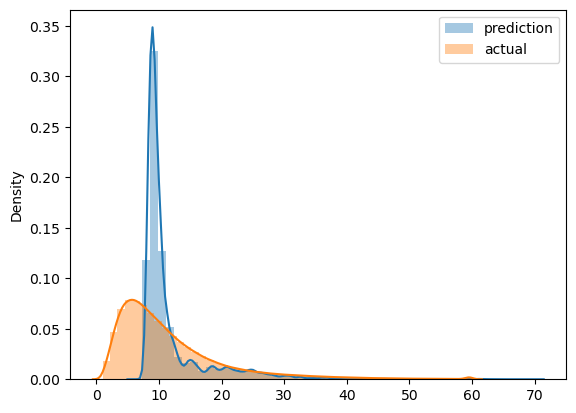

In [35]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [36]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [39]:
df_train = read_dataframe('/home/bcthakreda/mlops_zoomcamp/Machine-Learning-ZoomCamp/week1/data/yellow_tripdata_2021-01.parquet')
df_val = read_dataframe('/home/bcthakreda/mlops_zoomcamp/Machine-Learning-ZoomCamp/week1/data/yellow_tripdata_2021-02.parquet')